In [1]:
import numpy as np

In [2]:
from firing_signals.rsnn.rsnn import RSNN
from firing_signals.sampling.bffs import backward_filtering_forward_sampling

In [3]:
num_neurons = 5
num_synapses = 50 #per neuron
Tr = 3

In [4]:
net = RSNN(num_neurons, num_synapses, Tr=Tr)

In [5]:
length = 10

In [6]:
data = np.array([backward_filtering_forward_sampling(length, Tr, loop=True) for _ in range(num_neurons)])
data

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [7]:
net.memorize(data)

Weights optimization on neuron 0 is done!
Weights optimization on neuron 1 is done!
Weights optimization on neuron 2 is done!
Error in memorization...


In [8]:
def is_memorized(net, data):
    for l in range(length):
        rolled_data = np.roll(data, -l, axis=-1)
        pred = net.forward(rolled_data[..., -net.Th :])
        true = rolled_data[..., 0]
        
        if np.any(np.not_equal(pred, true)):
            return False
    
    return True

In [9]:
is_memorized(net, data)

False

In [10]:
net.forward(data[:,:8])

array([1, 1, 1, 1, 1])

In [11]:
net.weights

array([[-0.04136189,  0.2420164 ,  0.40796389,  0.53701074, -0.21899322,
        -0.93402279, -0.23038861, -0.17812687,  0.33476429,  0.19044888,
        -0.62538864,  0.14430062,  0.43129982,  0.69497455, -0.71980903,
         0.91481548,  0.60262317,  0.53735364,  0.44171415,  0.75737207,
        -0.79913901,  0.30674895, -0.82188648,  0.57900801, -0.50247303,
         0.68444198,  0.57960428, -0.24307483, -0.07106989,  0.0070088 ,
        -0.63861811,  0.00595551, -0.66248192, -0.52505985, -0.64215252,
        -0.4190989 ,  0.31127061,  0.82808585,  0.20932654, -0.05557656,
        -0.35229109, -0.4227182 , -0.33766009,  0.55102363, -0.58612055,
        -0.27208051, -0.06172205,  0.31650099, -0.74231833,  0.44372821],
       [-0.72548656,  0.25442135, -0.69368281,  0.80644004, -0.62495725,
        -0.30807127,  0.1006569 , -0.53729624, -0.16361758,  0.69954578,
        -0.5068771 ,  0.392097  , -0.5493194 ,  0.06845682, -0.76612878,
         0.1216113 ,  0.21269775,  0.71510093,  0.

In [8]:
# MEMORIZATION PARAMETERS TO INVESTIGATE
# number of synapses and neurons
# length of the stimuli Th (find a lower bound)
# refractory period, delays and weights boundaries
# length of the message (find an upper bound)

In [9]:
# Markov chain of the given sequence is deterministic (knowing the current state, we know the next state)!!
# BUT MUST BE VERY CHAOTIC (hard to determine the Markov chain given partial data)

In [3]:
from math import *

def divisors(n):
 
    i = 1
    lst = []
    while (i * i < n):
        if (n % i == 0):
            lst.append(i)
 
        i += 1
 
    for i in range(int(sqrt(n)), 0, -1):
        if (n % i == 0):
            lst.append(n//i)
 
    return lst

In [12]:
divisors(12)[:-1]

[1, 2, 3, 4, 6]

In [9]:
def divisors_1(n):
    return [d for d in range(1, n+1) if not n % d]

In [10]:
%timeit divisors_1(8273)

375 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
import numpy as np
seq = np.array([0, 1, 0, 0, 1, 0])

def is_reducible(seq, length):
    for d in divisors(length)[1:]:
        T = length // d
        
        if np.all([np.array_equal(seq[:T], seq[(k + 1) * T : (k + 2) * T]) for k in range(d - 1)]):
            return True

    return False

In [40]:
is_reducible(seq, 6)

True

In [55]:
import numpy as np
from numpy.linalg import matrix_power


In [93]:
def card(L, Tr, cyclic=True):
    def get_A(Tr):
        A = np.zeros((Tr + 2, Tr + 2))
        A[:-1, 1:] = np.identity(Tr + 1)
        A[0, 0] = 1.0
        A[-1, 0] = 1.0
        A[-1, 1] = 1.0
        
        return A

    if L < 1:
        raise ValueError(f"L must be stricly positive")

    if Tr < 0:
        raise ValueError(f"Tr must be positive")

    A = get_A(Tr)

    if cyclic:
        return int(np.trace(matrix_power(A, L)))

    if L <= Tr:
        return L + 1

    return int(np.sum(matrix_power(A, L - Tr - 1)))



In [94]:
L = 250
Tr = 200

card(L, Tr)


251

In [5]:
np.identity(1)

array([[1.]])

In [40]:
%%timeit 
phis = np.roots([1, -1] + [0] * (20 - 2) + [-1])

428 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%%timeit
A = get_A(19)
phis, _ = np.linalg.eig(A)

513 µs ± 5.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [95]:
np.empty(4)

array([1., 0., 0., 1.])

In [100]:
ends_with = np.ones((2, 10), int)
np.concatenate((ends_with, np.zeros((2, 12 - 10), int)), axis=1)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

In [108]:
ends_with = np.array([[0, 1, 1],[1, 0, 0]])
N_end, L_end = ends_with.shape
L = 10
N = 2

np.concatenate((np.random.binomial(1, 0.5, (N, L - L_end)), ends_with), axis=1)

array([[1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 0]])

In [1]:
from rsnn.firing_sequences.sampling import single_channel_sampling, multi_channel_sampling
from rsnn.firing_sequences.utils import is_predictable

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


In [3]:
def compute_p(N, L, Tr, Tw):
    p = 0
    for _ in range(1000):
        sample = multi_channel_sampling(N, L, Tr)
        if is_predictable(sample, N, L, Tr, Tw):
            p += 1
    return p / 1000


In [15]:
Tr = 2
L = 20

N_min, N_max = 1, 10
Tw_min, Tw_max = Tr+1, L
H, W = N_max - N_min, Tw_max - Tw_min

N, Tw = np.mgrid[N_min:N_max, Tw_min:Tw_max].reshape(2, -1)

p = np.empty(H*W)
for i in tqdm(range(H*W)):
    p[i] = compute_p(N[i], L, Tr, Tw[i])

100%|█████████████████████████████████████████| 153/153 [07:26<00:00,  2.92s/it]


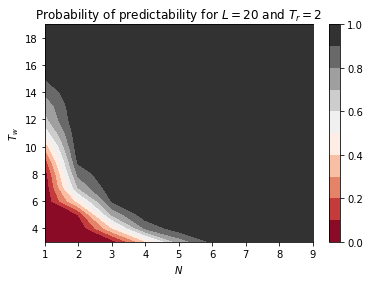

In [16]:
plt.contourf(N.reshape(H, W), Tw.reshape(H, W), p.reshape(H, W), 10, cmap='RdGy')
plt.xlabel(r"$N$")
plt.ylabel(r"$T_w$")
plt.title(f"Probability of predictability for $L = {L}$ and $T_r = {Tr}$")
plt.colorbar()
plt.savefig(f"predictability_{L}_{Tr}.pdf")